In [1]:
%matplotlib widget

In [2]:
from bmcs_cross_section.mkappa import MKappa
from bmcs_utils.api import InteractiveWindow
from bmcs_cross_section.cs_design.cs_shape import TShapeCS
import matplotlib.pyplot as plt
import numpy as np
from bmcs_cross_section.mkappa.mkappa_ import \
    MKappaSymbolic as MKappaSymbolic_, ModelData as ModelData_, MKappa as MKappa_
import sympy as sp
sp.init_printing()

In [3]:
symb = MKappaSymbolic_()
mc_ = MKappa_(idx=25, n_m=10)
model_data = ModelData_()

# Material parameters [mm], [N/mm2]
model_data.h = 666
model_data.E_ct = 24000
model_data.E_cc = 24000
model_data.eps_cr = 0.000125
model_data.eps_cy = 0.0010625  # 8.5 * eps_cr_
model_data.eps_cu = 0.0035
model_data.eps_tu = 0.02
model_data.mu = 0.33

# 2 layers reinforcement details
model_data.A_j = np.array([250, 0])  # A_j[0] for tension steel / A_j[1] for compression steel
model_data.z_j = np.array([0.1 * model_data.h, 0.9 * model_data.h])
model_data.E_j = np.array([210000, 210000])
model_data.eps_sy_j = np.array([0.002, 0.002])

# Defining a variable width (T-section as an example)
b_w = 50
b_f = 500
h_w = 0.85 * model_data.h
# Beam width b as a function of the height z (the sympy z symbol in MomentCurvatureSymbolic is used)
model_data.b = sp.Piecewise((b_w, mc_.mcs.z < h_w), (b_f, mc_.mcs.z >= h_w))

mc_.model_data = model_data

# If plot_norm is used, use the following:
# mc.kappa_range = (0, mc.kappa_cr * 100, 100
mc_.kappa_range = (-0.00002, 0.00002, 10)

In [4]:
mc_.kappa_t

array([-2.00000000e-05, -1.55555556e-05, -1.11111111e-05, -6.66666667e-06,
       -2.22222222e-06,  2.22222222e-06,  6.66666667e-06,  1.11111111e-05,
        1.55555556e-05,  2.00000000e-05])

In [5]:
mc_.eps_bot_t

Piecewise((0, kappa*z - varepsilon_bot > -0.0035), (25.5, kappa*z - varepsilon_bot > -0.0010625), (-24000.0*kappa*z + 24000.0*varepsilon_bot, (kappa*z - varepsilon_bot > -0.000125) | (kappa*z - varepsilon_bot > 0)), (0.99, kappa*z - varepsilon_bot > -0.02), (0, True))


array([-0.00258789, -0.00225556, -0.00185634, -0.00079286, -0.000148  ,
        0.000148  ,  0.000444  ,  0.00074   ,  0.001036  ,  0.001332  ])

In [6]:
mc_.get_N_c_t(mc_.kappa_t, mc_.eps_bot_t)


array([65934., 62271., 58608., 18315.,     0.,     0.,     0.,     0.,
           0.,     0.])

# New version

In [7]:
# T-section example
H = 666
# Defining a variable width (T-section as an example)
b_w = 50
b_f = 500
h_w = 0.85 * H
tshape = TShapeCS(H=H, B_w=b_w, B_f=b_f, H_w=h_w)

mc = MKappa(n_kappa = 10, n_m = 10)
mc.cross_section_shape = tshape

# Material parameters [mm], [N/mm2]
mc.E_ct = 24000
mc.E_cc = 24000
mc.eps_cr = 0.000125
mc.eps_cy = 0.0010625  # 8.5 * eps_cr_
mc.eps_cu = 0.0035
mc.eps_tu = 0.02
mc.mu = 0.33

# 2 layers reinforcement details
mc.A_j = np.array([250, 0])  # A_j[0] for tension steel / A_j[1] for compression steel
mc.z_j = np.array([0.1 * mc.H, 0.9 * mc.H])
mc.E_j = np.array([210000, 210000])
mc.eps_sy_j = np.array([0.002, 0.002])

# If plot_norm is used, use the following:
# mc.kappa_range = (0, mc.kappa_cr * 100, 100

mc.kappa_slider = -0.00001 # corresponds to idx = 25
mc.low_kappa = -0.00002
mc.high_kappa = 0.00002

# Comparison

In [8]:
kappa_t = mc.kappa_t
eps_bot_t = mc.eps_bot_t

k1, e1, z1 = kappa_t[-3], eps_bot_t[-3], mc.z_m[-3]

In [9]:
mc_test = mc.symb.get_sig_c_z(k1, e1, z1)
mc_test_ = mc_.mcs.get_sig_c_z(k1, e1, z1)
mc_test - mc_test_

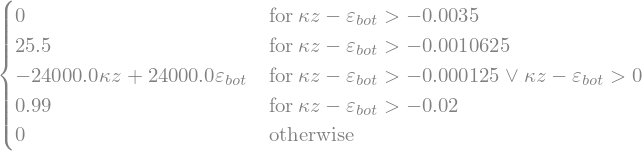

In [10]:
mc.symb.sig_c_z.subs(mc_.mcs.model_data_mapping)

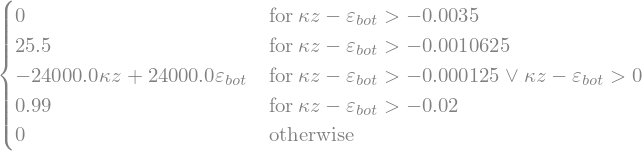

In [11]:
mc_.mcs.sig_c_z_lin.subs(mc_.mcs.model_data_mapping)

In [12]:
mc_.kappa_t - mc.kappa_t

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
mc_.eps_bot_t - mc.eps_bot_t

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
mc_.get_N_c_t(mc_.kappa_t, mc_.eps_bot_t)

array([65934., 62271., 58608., 18315.,     0.,     0.,     0.,     0.,
           0.,     0.])

In [16]:
mc.kappa_t

array([-2.00000000e-05, -1.55555556e-05, -1.11111111e-05, -6.66666667e-06,
       -2.22222222e-06,  2.22222222e-06,  6.66666667e-06,  1.11111111e-05,
        1.55555556e-05,  2.00000000e-05])

In [17]:
mc.eps_bot_t

array([-0.00258789, -0.00225556, -0.00185634, -0.00079286, -0.000148  ,
        0.000148  ,  0.000444  ,  0.00074   ,  0.001036  ,  0.001332  ])

In [17]:
kappa_t = mc.kappa_t
eps_bot_t = mc.eps_bot_t

In [18]:
z_tm = mc.z_m[np.newaxis, :]
z_tm

array([[  0.,  74., 148., 222., 296., 370., 444., 518., 592., 666.]])

In [ ]:
b_z_m = mc.cross_section_shape.get_b(z_tm)
b_z_m

In [ ]:
N_z_tm = b_z_m * mc.symb.get_sig_c_z(kappa_t[:, np.newaxis], eps_bot_t[:, np.newaxis], z_tm)
N_z_tm

In [ ]:
test = mc.symb.get_sig_c_z(kappa_t[:, np.newaxis], eps_bot_t[:, np.newaxis], z_tm)
test

In [ ]:
np.trapz(N_z_tm, x=z_tm, axis=-1)

# Verify and demonstrate the M-k relation

In [ ]:
mc = MKappa(low_kappa=-0.000014, high_kappa=0.00003)
bd = mc.beam_design
css = bd.cross_section_shape
csl = bd.cross_section_layout
csl.reinforcement.z_j = [10]
InteractiveWindow([mc, bd, mc.matrix, css, csl]).interact()

In [ ]:
import numpy as np
import matplotlib.pylab as plt
xdata = np.array([0,1,0.9, 0.8, 2])
ydata = np.array([0,1,2,3, 4])

In [ ]:
plt.plot(xdata, ydata)
plt.show()

In [ ]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

In [ ]:
ij = np.mgrid[0:5:1,0:5:1]
ij

In [ ]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [ ]:
diffs

In [ ]:
i_x = np.argmin(diffs, axis=1)

In [ ]:
xdata[i_x]

In [ ]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [ ]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

In [ ]:
ij = np.mgrid[0:5:1,0:5:1]
ij

In [ ]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [ ]:
diffs

In [ ]:
i_x = np.argmin(diffs, axis=1)

In [ ]:
xdata[i_x]

In [ ]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [ ]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

In [ ]:
ij = np.mgrid[0:5:1,0:5:1]
ij

In [ ]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [ ]:
diffs

In [ ]:
i_x = np.argmin(diffs, axis=1)

In [ ]:
xdata[i_x]

In [ ]:
plt.plot(xdata[i_x], ydata)
plt.show()